In [2]:
pip install jupyter-tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.2 MB/s 
  Created wheel for jupyter-tensorboard: filename=jupyter_tensorboard-0.2.0-py2.py3-none-any.whl size=15257 sha256=cec8272c20237826ec67a5717fed9346ba58ff9b0bd960bed57ad4cab7a25754
  Stored in directory: /root/.cache/pip/wheels/59/14/ab/6d0bce449039ebdcbf45c1aff8c19153a68bf3f0492a32620e
Successfully built jupyter-tensorboard


170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


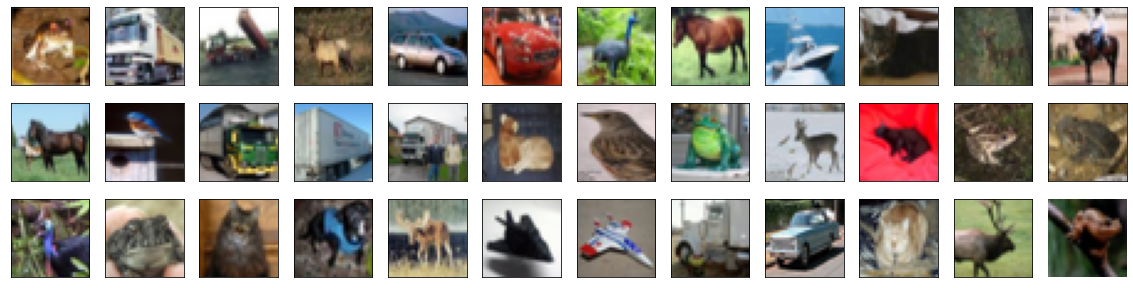

In [3]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns
from keras.datasets import cifar10
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
        
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

tf.keras.backend.clear_session()
np.random.seed(33)
tf.random.set_seed(77)

(X_train_full, Y_train_full) , (X_test, Y_test) = cifar10.load_data()

print(X_train_full.shape)

fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(X_train_full[i])

X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test/255.

plt.imshow(X_train[0])
plt.axis('off')
plt.show()

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [8]:
# 학습데이터의 log를 저장할 폴더 생성 (지정)
conf_name= "CNN-4차시도"
log_dir = "logs/my_board/" + conf_name

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

model = tf.keras.models.Sequential()
model.add(Conv2D(16,(3, 3), padding='same', strides=1, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(16,(3, 3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3, 3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(32,(3, 3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3, 3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(64,(3, 3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(64,(3, 3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3, 3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(128,(3, 3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(128,(3, 3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3, 3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(256,(3, 3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(256,(3, 3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(258, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 32)        9248      
                                                      

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [10]:
history = model.fit(X_train, Y_train, 
                        epochs=30, 
                        validation_data=(X_valid, Y_valid),
                        batch_size=250,
                        callbacks=[early_stopping_callback,tensorboard_callback])

Epoch 1/30
180/180 [==============================] - 454s 3s/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0983 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0920
Epoch 2/30
180/180 [==============================] - 453s 3s/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1006 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0920
Epoch 3/30
180/180 [==============================] - 452s 3s/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0995 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0920
Epoch 4/30
180/180 [==============================] - 452s 3s/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0996 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0920
Epoch 5/30
180/180 [==============================] - 452s 3s/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0995 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0920
Epoch 6/30
180/180 [==============================] - 449s 2s/step - loss: 2.3027 - sparse_cate

In [11]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 16s 49ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000


[2.3025989532470703, 0.10000000149011612]